# Sentiment Analysis Poltik Indonesia

# Model Training & Evaluation
Model yang digunakan untuk training dataset hasil dari TF-IDF adalah traditional mechine learning <br>
karena dataset yang dimiliki relatif kecil

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter   # Untuk menghitung frekuensi kata
from wordcloud import WordCloud   


In [3]:
# Load Dataset

df = pd.read_csv('rev_tweet_preprocess_tfidf.csv')
df.head()

,sentimen,tweet,tweet_lowercase,tweet_tokenized,tweet_stemmed,tweet_process
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,"['Kata', '@prabowo', 'Indonesia', 'tidak', 'di...","['kata', 'prabowo', 'indonesia', 'tidak', 'har...",kata prabowo indonesia tidak harga bangsa asin...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","['Batuan', 'Langka', ',', 'Tasbih', 'Jokowi', ...","['batu', 'langka', '', 'tasbih', 'jokowi', 'ha...",batu langka tasbih jokowi hadiah dari habib l...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....","['Di', 'era', 'Jokowi', ',', 'ekonomi', 'Indon...","['di', 'era', 'jokowi', '', 'ekonomi', 'indone...",di era jokowi ekonomi indonesia makin baik i...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...","['Bagi', 'Sumatera', 'Selatan', ',', 'Asian', ...","['bagi', 'sumatera', 'selatan', '', 'asi', 'ga...",bagi sumatera selatan asi games dampak pd eko...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,"['Negara', 'kita', 'ngutang', 'buat', 'bngun',...","['negara', 'kita', 'ngutang', 'buat', 'bngun',...",negara kita ngutang buat bngun infrastruktur y...


In [4]:
# Buat variabel label fitur dan target

vectorizer = CountVectorizer(max_features=5000, binary=True)
X = vectorizer.fit_transform(df['tweet_process'].fillna(''))
y = df['sentimen']
print('Shape TF-IDF matrix:', X.shape)

Shape TF-IDF matrix: (1815, 5000)


In [5]:
# Split data train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Jumlah data train : ', X_train.shape[0])
print('Jumlah data test : ', X_test.shape[0])

Jumlah data train :  1452
Jumlah data test :  363


- Training model menggunakan Logistic Regression <br>
(cocok untuk klasifikasi biner multikelas)

In [6]:
# Training model menggunakan LogisticRegression

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

- Evaluasi model

In [7]:
# Evaluasi model CountVectorizer

y_pred = model.predict(X_test)
print('Akurasi CountVetorizer : ', accuracy_score(y_test, y_pred))
print('Laporan Klasifikasi CountVectorizer : \n', classification_report(y_test, y_pred))

Akurasi CountVetorizer :  0.6115702479338843
Laporan Klasifikasi CountVectorizer : 
               precision    recall  f1-score   support

     negatif       0.62      0.64      0.63       117
      netral       0.61      0.58      0.60       127
     positif       0.60      0.61      0.61       119

    accuracy                           0.61       363
   macro avg       0.61      0.61      0.61       363
weighted avg       0.61      0.61      0.61       363



- Hyperparameter Tuning menggunakan GridSearch

In [8]:
# Tuning Hyperparameter GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear'], 
    'penalty': ['l2'],
    'class_weight': ['balanced', None]
    }
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=15, scoring='accuracy')
grid.fit(X_train, y_train)
print("Parameter terbaik:", grid.best_params_)
print("Akurasi terbaik:", grid.best_score_)

Parameter terbaik: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Akurasi terbaik: 0.6012313860252003


- coba algoritma lain
- count factorizer (binary)
- coba tweet tokenizer
- coba bandingan data yang ada isi dan tanpa hastag
- maksimal 0.70 sekarang
- lihat score klasifikasi, identifikasi kenapa ada score yang kecil 
- cek untuk deep learning
- tweet_process itu kan digabungkan jadi 1 kalimat, coba untuk tetap di split per kata untuk lihat akurasinya


### Visualisasi

10 Kata Paling Sering
ekonomi: 1043
jokowi: 918
dan: 750
prabowo: 748
yg: 666
gaji: 549
di: 529
pak: 480
harga: 448
com: 432


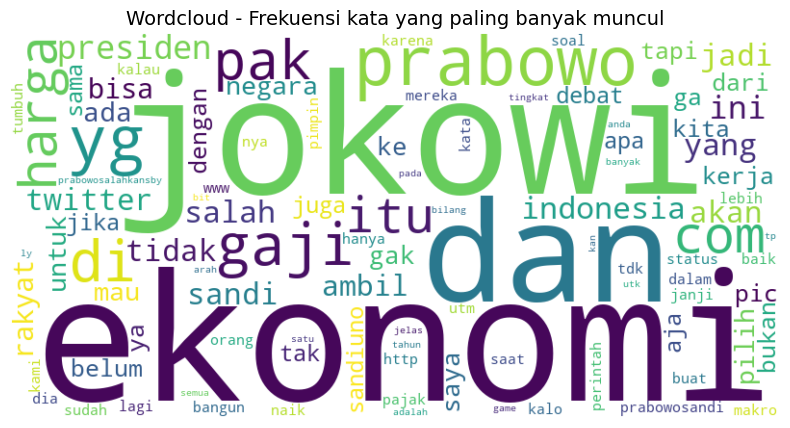

In [9]:
# Gabungkan semua teks di kolom tweet_process
all_text = ' '.join(df['tweet_process'].dropna())

# Hitung frekuensi kata
words = all_text.split()
word_freq = Counter(words)

# 10 kata paling sering
print("10 Kata Paling Sering")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      max_words=100, 
                      colormap='viridis', 
                      min_font_size=10).generate_from_frequencies(word_freq)

# wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud - Frekuensi kata yang paling banyak muncul', fontsize=14)
plt.axis('off')
plt.show()

Rata-rata jumlah tweet per sentimen
sentimen
negatif    27.12
netral     22.35
positif    28.20
Name: word_count, dtype: float64


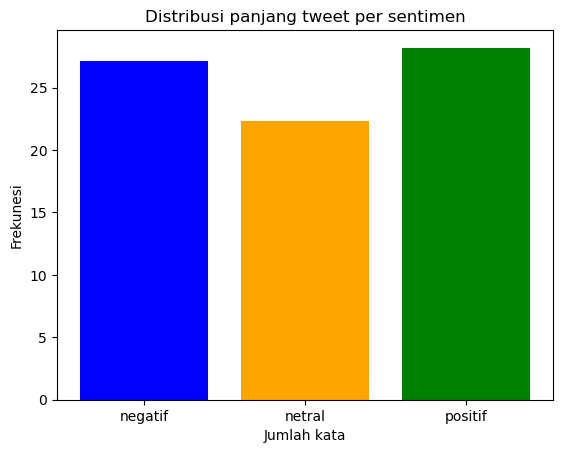

In [10]:
# Buat kolom baru untuk hitung jumlah kata dari setiap target tweet
df['word_count'] = df['tweet_process'].dropna().apply(lambda x: len(x.split()))

avg_wordcount = df.groupby('sentimen')['word_count'].mean().round(2)

print("Rata-rata jumlah tweet per sentimen")
print(avg_wordcount)

# Buat barchart
plt.bar (avg_wordcount.index, avg_wordcount.values, color=['blue', 'orange', 'green'])
plt.title('Distribusi panjang tweet per sentimen')
plt.xlabel('Jumlah kata')
plt.ylabel('Frekunesi')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

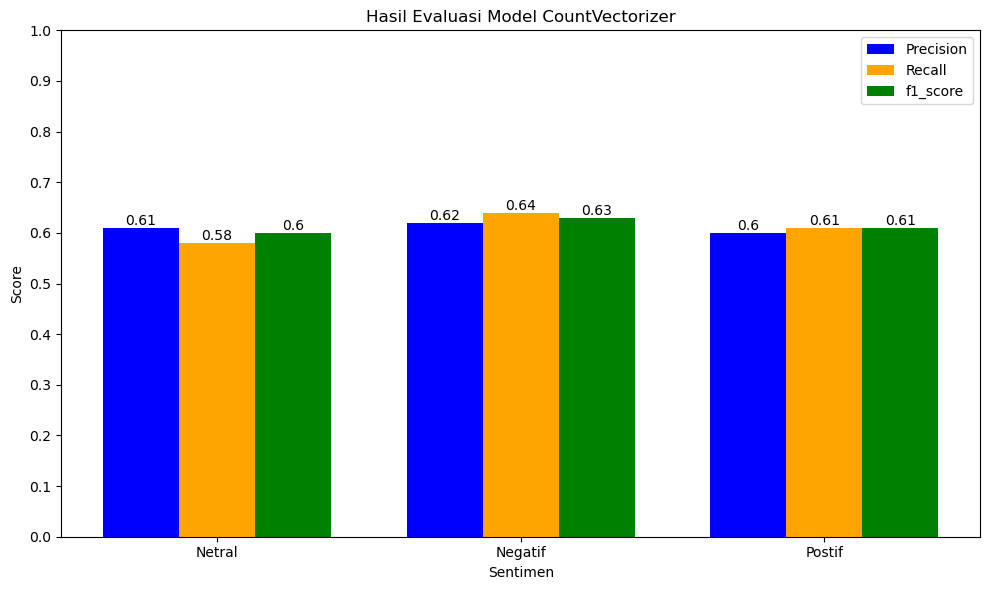

In [11]:
# Visualisasi hasil evaluasi model
sentimen = ['Netral', 'Negatif', 'Postif']
precision = [0.61, 0.62, 0.60]
recall = [0.58, 0.64, 0.61]
f1_score = [0.60, 00.63, 0.61]

x = np.arange(len(sentimen))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim(0.0, 1.0)
ax.set_yticks(np.arange(0.0, 1.1, 0.1))

# Buat bar chart untuk precision, recall, dan f1_score
bar1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
bar2 = ax.bar(x, recall, width, label='Recall', color='orange')
bar3 = ax.bar(x + width, f1_score, width, label='f1_score', color='green')

ax.set_xlabel('Sentimen')
ax.set_ylabel('Score')
ax.set_title('Hasil Evaluasi Model CountVectorizer')
ax.set_xticks(x)
ax.set_xticklabels(sentimen)

# Tambah nilai untuk setiap bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

ax.legend()
plt.tight_layout()
plt.show()

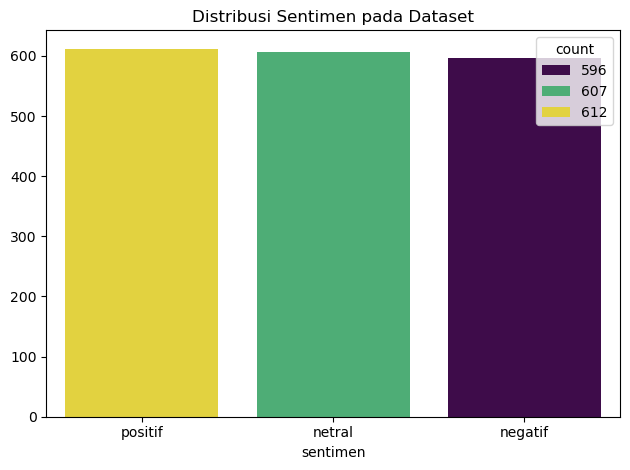

In [12]:
distribusi_sentimen = df['sentimen'].value_counts()

plt.Figure(figsize=(8, 5))

sns.barplot(x=distribusi_sentimen.index,
            y=distribusi_sentimen.values,
            palette='viridis',
            hue=distribusi_sentimen,
            order=distribusi_sentimen.index)
plt.title('Distribusi Sentimen pada Dataset')


plt.legend=False
plt.tight_layout()
plt.show()


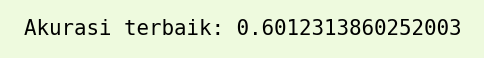

In [24]:
visualisasi_hyperparameter = pd.DataFrame(grid.cv_results_)

def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 0.5), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=15)
    ax.axis("off")
    plt.show()


plt.rcParams["font.family"] = "monospace"
print_text('Akurasi terbaik: 0.6012313860252003')